In [1]:
import os
import glob
import re

import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt

In [2]:
files = glob.glob('/cephfs/users/annawoodard/gene-fusion/results_v1/*/*/star-fusion.fusion_predictions.tsv')
id_map = pd.read_csv('/cephfs/users/annawoodard/gene-fusion/WABCS-U01_Samples_Phenotype_master2B.csv')

def parse_data(path):
    df = pd.read_table(path)
    sample, lane = path.split('/')[6:8]
    patient = id_map[id_map['NGDx RNAseq Lib ID'] == sample[:-2]]['NBCS barcode'].iloc[0]
    
    df['sample'] = sample
    df['lane'] = lane
    df['patient'] = patient
    
    return df

dfs = [parse_data(f) for f in files]
data = pd.concat(dfs)

In [27]:
cutflow = {}

In [28]:
# tcga.normal.id appears to be identical list
tcga_normal = pd.read_table('/cephfs/users/annawoodard/gene-fusion/CPTAC3-RNA-related-pipeline/FilterDatabase/tcga.normal.txt', names=['cancer', 'sample', 'fusion'])
cutflow['tcga normal'] = data.loc[data['#FusionName'].isin(tcga_normal.fusion), '#FusionName']

In [29]:
noncancer_cell = pd.read_table('/cephfs/users/annawoodard/gene-fusion/CPTAC3-RNA-related-pipeline/FilterDatabase/noncancer_cell.txt', names=['fusion'])
cutflow['noncancer cell'] = data.loc[data['#FusionName'].isin(noncancer_cell.fusion), '#FusionName']

In [30]:
gtex_or_paralogue = pd.read_table('/cephfs/users/annawoodard/gene-fusion/CPTAC3-RNA-related-pipeline/FilterDatabase/blacklist.manual', names=['fusion'])
cutflow['gtex or paralogue'] = data.loc[data['#FusionName'].isin(gtex_or_paralogue.fusion), '#FusionName']

Text(0.5, 1.0, 'unique fusions filtered')

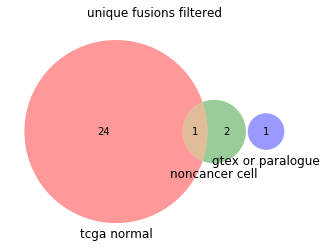

In [31]:
items = cutflow.items()
venn3([set(values) for key, values in items], set_labels = [key for key, values in items])
plt.title('unique fusions filtered')

In [32]:
print('{} fusions filtered / {} total fusions'.format(
    sum([len(values) for values in cutflow.values()]),
    len(data)
    )
)

150 fusions filtered / 4732 total fusions


In [33]:
data.to_parquet('/cephfs/users/annawoodard/gene-fusion/fusions.parquet')